# Model fitting to experimental data

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/cghiaus/var_cond/HEAD?labpath=notebooks%2F01_model_fitting.ipynb)

In [1]:
import sys
sys.path.append('../src')  # Add 'scr' directory to system path
import var_cond

## Linear model
The thermal conductivity of some construction materials vary linearly with temperature in the temperature range -10 °C ... 50 °C (Berardi et al. 2018).

Let's consider the data reported by Berardi et al. (2018) and find a linear model for variable thermal conductivity of fiberglass. For the fitted model:

$$\lambda = a \theta + b $$

they founded the coefficients:
$$a = 0.0002$$
$$b = 0.04$$

The coefficients of the linear model for thermal conductivity,

$$\lambda = \lambda_0 [1 + \beta (\theta - \theta_0)]$$

are:

$$\lambda_0 = b + a \theta_0$$

$$\beta = \frac{a}{b + a \theta_0}$$

Note that $\theta_0$ can be selected arbitrarily. It corresponds to the base temperature for which $\lambda = \lambda_0$. One choice could be:

$\theta_0 = 0 \ \mathrm{°C}$

for which

$$\lambda = \lambda_0 (1 + \beta \theta)$$

and another one 

$$\theta_0 = (T_0 + T_1)/2$$

for which

$$\lambda = \lambda_0$$

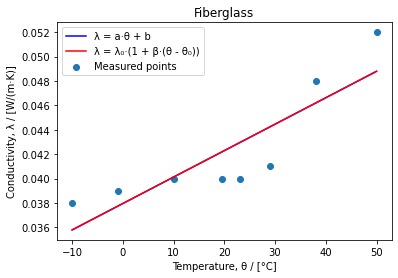

a = 0.0002, b = 0.0380
λ₀ = 0.040 W/(m·K), β = 0.00540 W/(m·K²), θ0 = 10.0 °C
Coefficient of determination: R² = 0.7466 


In [2]:
material = 'Fiberglass'
deg = 1     # model degree
θ0 = 10     # °C, base temperature (arbitrary)
var_cond.fit_data2plot(θ0, deg, material)

> Figure 1. Variable conductivity of fiberglass (data adapted from Berardi et al., 2018).

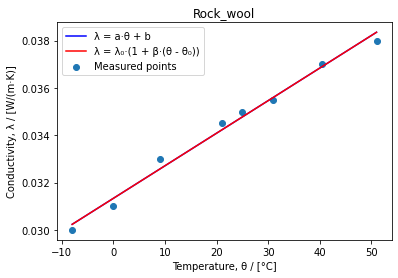

a = 0.0001, b = 0.0313
λ₀ = 0.033 W/(m·K), β = 0.00420 W/(m·K²), θ0 = 10.0 °C
Coefficient of determination: R² = 0.9885 


In [3]:
material = 'Rock_wool'
deg = 1     # model degree
θ0 = 10     # °C, base temperature (arbitrary)
var_cond.fit_data2plot(θ0, deg, material)

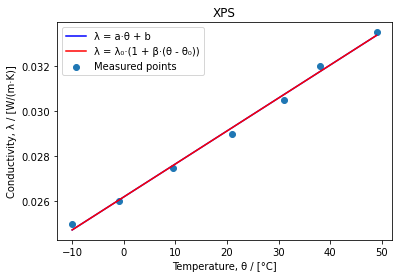

a = 0.0001, b = 0.0262
λ₀ = 0.028 W/(m·K), β = 0.00528 W/(m·K²), θ0 = 10.0 °C
Coefficient of determination: R² = 0.9952 


In [4]:
material = 'XPS'
deg = 1     # model degree
θ0 = 10     # °C, base temperature (arbitrary)
var_cond.fit_data2plot(θ0, deg, material)

### Quadratic model
Berardi et al. (2018) measured the variation of thermal conductivity with temperature for polyisocyanurate. In this case, we will fit a quadratic model:

$$\lambda = a \theta^2 + b \theta + c$$

The coefficients of the quadratic model:

$$\lambda = \lambda_0 [1 + \beta (\theta - \theta_0)^2]$$

are:
$$\lambda_0 = - \frac {b^2 - 4ac}{4a}$$

$$\beta = - \frac{4a^2}{b^2 - 4ac}$$

and
$$\theta_0 = - \frac{b}{2a}$$

Note that in this case $\theta_0$ depends on the regression coefficients (it is not independent).

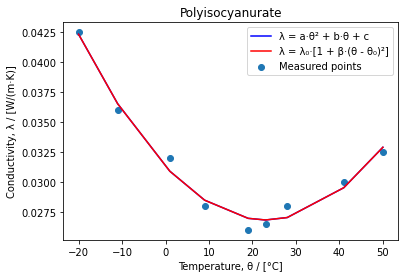

a = 8.364e-06, b = -3.857e-04, c = 3.128e-02
λ₀ = 0.027 W/(m·K), β = 0.00031 W/(m·K²), θ0 = 23.1 °C
Coefficient of determination: R² = 0.9816 


In [5]:
material = 'Polyisocyanurate'
deg = 2     # model degree
θ0 = None   # base temperature, from model fitting

var_cond.fit_data2plot(θ0, deg, material)

> Figure 2. Variable conductivity of polyisocyanurate (data adapted from Berardi et al., 2018).

## Average heat conductivity
The average heat conductivity over a range of temperatures is (Cengel Y. & Ghajar A. 2020, eq. 2-75):

$$\bar{\lambda} = \frac{\int_{T0}^{T1} \lambda d \theta}{T_1 - T_0}$$

This is based on the condition that the heat rate is the same whether the conductivity is constant (equal to average) or variable.

The average conductivity can be used to determine the heat rate in steady state. For example, for a plane wall, The average heat conductivity over a range of temperatures is (Cengel Y. & Ghajar A. 2020, eq. 2-76):

$$
\dot Q = \frac{\bar \lambda A }{L}(T_1 - T_0) = \frac{A}{L}  \int_{T_0}^{T_1}\lambda d \theta
$$

### Linear model
If in the temperature interval $[T_0, \ T_1]$ the dependence of thermal conductivity is linear:

$$\lambda = \lambda_0 (1 + \beta \theta)$$

then the average thermal conductivity is

$$\bar \lambda = \lambda_0 \left ( 1 + \beta \frac{T_0 + T_1}{2}  \right )$$.

If in the temperature interval $[T_0, \ T_1]$ the dependence of thermal conductivity  is modelled by

$$
\lambda = \lambda_0 [1 + \beta (\theta - \theta_0)]
$$

then the average thermal conductivity is

$$
\bar{\lambda} = \lambda_0 \left[1 + \beta \left(\frac{T_0 + T_1}{2} - \theta_0 \right ) \right]
$$

### Quadratic model
If the dependence is quadratic:

$$\lambda = \lambda_0 (1 + \beta \theta^2)$$

then the average thermal conductivity is (Cengal, Ghajar, 2020a):

$$\bar{\lambda} 
= \frac{\int_{T0}^{T1} \lambda d \theta}{T_1 - T_0}
= \lambda_0 \left (1 + \beta \frac{T_0^2 + T_0 T_1  + T_1^2}{3} \right)$$

If in the temperature interval $[T_0, \ T_1]$ the dependence of thermal conductivity  is modelled by

$$
\lambda = \lambda_0 [1 + \beta (\theta - \theta_0)^2]
$$

then the average thermal conductivity is

$$
\bar{\lambda} = \lambda_0  \left[ 1 +\beta  \left( \frac{T_0^2 + T_0 T_1 + T_1^2}{3} - \theta_0 (T_0 + T_1 - \theta_0) \right )\right]
$$

## References

- Cengel, Y. A., & Ghajar, A. J. (2015). Heat and Mass Transfer: Fundamentals and Applications, 5th Edition, McGraw-Hill Education. New York. ISBN 978-0-07-339818-1

- [Cengel Y. & Ghajar A. (2020)](https://www.studocu.com/in/document/priyadarshini-engineering-college/english/htchapter-02-xyz/42524065). Chapter 2 Heat conduction equation, in Heat and Mass Transfer: Fundamentals and Applications, 6th Edition, McGraw-Hill Education, ISBN10: 0073398195 | ISBN13: 9780073398198

- [Cengel Y. & Ghajar A. (2020a)](https://www.studocu.com/row/document/celal-bayar-universitesi/engineering-mechanics/heat-chap02-094-this-is-summaries/11179160). Chapter 2 Heat conduction equation, in Heat and Mass Transfer: Fundamentals and Applications, 6th Edition, Solution manual, McGraw-Hill Education

- [Berardi U. et al.(2018)](https://doi.org/10.3390/en11040872). On the Effects of Variation of Thermal Conductivity in Buildings in the Italian Construction Sector, Energies, 11(4), 872

- [Wang, Y., Zhang, S., Wang, D., & Liu, Y. (2023)](https://doi.org/10.1016/j.enbenv.2022.02.008). Experimental study on the influence of temperature and humidity on the thermal conductivity of building insulation materials. Energy and Built Environment, 4(4), 386-398

- [Higgis, B.G. (2020)](https://doi.org/10.13140/RG.2.2.17178.36805) Heat Conduction with Variable Thermal Conductivity, University of California, Davis

- [Wilson, G., et al. (2014)](https://doi.org/10.1371/journal.pbio.1001745). Best practices for scientific computing. PLoS biology, 12(1), e1001745.

- [Wilson, G., et al. (2017)](https://doi.org/10.1371/journal.pcbi.1005510). Good enough practices in scientific computing. PLoS computational biology, 13(6), e1005510.

- [Noble WS (2009)](https://doi.org/10.1371/journal.pcbi.1000424) A Quick Guide to Organizing Computational Biology Projects. PLoS Comput Biol 5(7): e1000424.

- [Cookiecutter Data Science](https://drivendata.github.io/cookiecutter-data-science/), GitHub